## Project Objective:-

The goal of this project is to develop a machine learning model capable of accurately predicting obesity risk across multiple classes.  classifying individuals based on their obesity risk and  interpreting model predictions, we aim to empower individuals with a deeper understanding of their health status. Additionally, this model can serve as a valuable tool for healthcare professionals, enabling early intervention and personalized recommendations to mitigate obesity-related health risks.

developed by:

1- Mohamed Salama

2- Hajar Elbehairy 

3- Nagwa Mohamed 



# `01` Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier



----------------------------

# `02` Load Data


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.shape, test.shape

((20758, 18), (13840, 17))

In [4]:
train.head()

id  Gender        Age    Height      Weight family_history_with_overweight  \
0   0    Male  24.443011  1.699998   81.669950                            yes   
1   1  Female  18.000000  1.560000   57.000000                            yes   
2   2  Female  18.000000  1.711460   50.165754                            yes   
3   3  Female  20.952737  1.710730  131.274851                            yes   
4   4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE       CALC                 MTRANS           NObeyesdad  
0  0.976473  Sometimes  Public_Transportation  Overweight_Level_II  
1  1.000000         no             Automobile        Normal_Weight  
2  1.673584         no  Public_Transportation  Insufficient_Weight  
3  0.780199  Sometimes  Public_Transportation     Obesity_Type_III  
4  0.931721  Sometimes  Public_Transportation  Overweight_Level_II

### Spliting and shuffle the data

In [4]:
X_tr = train.drop("NObeyesdad",axis=1)
y_tr = train['NObeyesdad']

In [5]:
X_train,X_val,y_train,y_val = train_test_split(X_tr,y_tr,test_size=0.2,random_state=1234)

----------------

# `03` Exploratory Data Analysis (EDA)

## `i` Simple Analysis

Preview data, perform statistical data analysis and explore as much as needed to better understand the data set we're dealing with.




In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16606 entries, 13224 to 1318
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              16606 non-null  int64  
 1   Gender                          16606 non-null  object 
 2   Age                             16606 non-null  float64
 3   Height                          16606 non-null  float64
 4   Weight                          16606 non-null  float64
 5   family_history_with_overweight  16606 non-null  object 
 6   FAVC                            16606 non-null  object 
 7   FCVC                            16606 non-null  float64
 8   NCP                             16606 non-null  float64
 9   CAEC                            16606 non-null  object 
 10  SMOKE                           16606 non-null  object 
 11  CH2O                            16606 non-null  float64
 12  SCC                             16

In [8]:
X_train.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
dtype: int64

1- There is no null

2- object column --> Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS

3- there is some strange data types like:


   -age ---> float values
   
   -NCP(number of main meals) ---> float values
   

In [9]:
train.describe(percentiles=[0.01, 0.25, 0.5, 0.75, 0.99]).T.style.background_gradient(cmap='Blues_r')

⿢ Age
Range: 14 to 61 years.
Mean: 23.8 years, Median: 22.8 years.
99th percentile: 41 years, meaning most individuals are young.
Right-skewed distribution, with a few older individuals as outliers.
Insights:
✔ Majority are young adults, which may influence lifestyle patterns.
✔ Possible outliers above 41 years should be reviewed.

⿣ Height (m)
Range: 1.45m to 1.98m.
Mean: 1.70m, Median: 1.70m.
99th percentile: 1.89m, indicating a mostly normal distribution.
Low variability (SD: 0.087m), meaning height values are relatively consistent.
Insights:
✔ No extreme outliers, as distribution is normal.
✔ Consistent height range suggests accurate data collection.

⿤ Weight (kg)
Range: 39kg to 165kg.
Mean: 87.9kg, Median: 84.1kg.
99th percentile: 137.9kg, but maximum value (165kg) suggests extreme outliers.
Right-skewed distribution, meaning more people weigh above the mean than below.
High variability (SD: 26.4kg), suggesting a diverse population in terms of weight.
Insights:
✔ Potential obesity issues, as many people are above healthy weight ranges.
✔ Extreme values at the upper end may impact statistical models.

⿥ Vegetable Consumption Frequency (Scale: 1–3)
Range: 1 to 3.
Mean: 2.45, Median: 2.39.
75th percentile and 99th percentile both at 3, meaning many people consume vegetables regularly.
Clustering at higher values, suggesting a generally healthy dietary habit.
Insights:
✔ Most individuals eat vegetables frequently, which is a positive indicator for health.
✔ Further analysis could check whether this correlates with lower weight.

⿦ Main Meals Per Day
Range: 1 to 4.
Mean: 2.76, Median: 3.0.
Clustering at 3 meals per day, meaning a consistent eating habit.
Insights:
✔ Most individuals follow a standard meal pattern (3 meals/day).
✔ Outliers (1 or 4 meals/day) could indicate irregular eating habits.

⿧ Daily Water Intake (Scale: 1–3)
Range: 1 to 3.
Mean: 2.03, Median: 2.0.
Right-skewed distribution, with some individuals consuming less water than recommended.
Insights:
✔ Most people drink a moderate amount of water, but some may be dehydrated.
✔ Check correlation between water intake and weight/health outcomes.

⿨ Physical Activity Per Week
Range: 0 to 3.
Mean: 0.98, Median: 1.0.
25th percentile is 0.008, meaning many individuals report zero activity.
Right-skewed distribution, with some active individuals but a large inactive population.
Insights:
✔ Low physical activity levels may contribute to obesity risk.
✔ Investigate impact on weight and screen time habits.

⿩ Screen Time Per Day (hours)
Range: 0 to 2 hours.
Mean: 0.62, Median: 0.57.
25th percentile is 0, indicating some people report no screen time at all.
High variability (SD: 0.60), meaning some individuals use screens excessively while others don’t at all.
Insights:
✔ Zero-inflated distribution—some individuals report no screen time.
✔ Check correlation between high screen time and lower physical activity

❎ Important note : need to look more deep in FAF,NCP their qurtalies seems not normal.

In [10]:
train.describe(include=object).T.style.background_gradient(cmap='greens')

#### Checking Consistency of the coulmns

In [11]:
unique_NCP= X_train['NCP'].value_counts()
unique_NCP

NCP
3.000000    11718
1.000000     1614
4.000000      577
2.993623       32
2.695396       23
            ...  
3.618722        1
3.435904        1
2.389717        1
2.597608        1
1.513835        1
Name: count, Length: 643, dtype: int64

I Think the true values are 1,2,3,4 so we need to make a function to turn the float values to the integer values (1,2,3,4).

In [12]:
unique_FAF= X_train['FAF'].value_counts()
unique_FAF

FAF
0.000000    4047
1.000000    3334
2.000000    1918
3.000000     620
1.097905      47
            ... 
0.268983       1
0.669278       1
0.105408       1
1.127425       1
1.884520       1
Name: count, Length: 1291, dtype: int64

I think the true values are 0,1,2,3 and the other float values need to be 0,1,2,3

In [13]:
label = y_train.value_counts()
label

NObeyesdad
Obesity_Type_III       3216
Obesity_Type_II        2599
Normal_Weight          2503
Obesity_Type_I         2322
Overweight_Level_II    2017
Insufficient_Weight    2013
Overweight_Level_I     1936
Name: count, dtype: int64

## `ii` Visual Analysis

Plot graphs and relations in order to gain more insights about the data set, identify patterns, and make assumptions.


In [14]:
numerical = train.select_dtypes(include=["number"])
numerical.columns

Index(['id', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')

In [15]:
categorical = train.select_dtypes(include=["object"])
categorical.columns

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

#### Univariate visualization

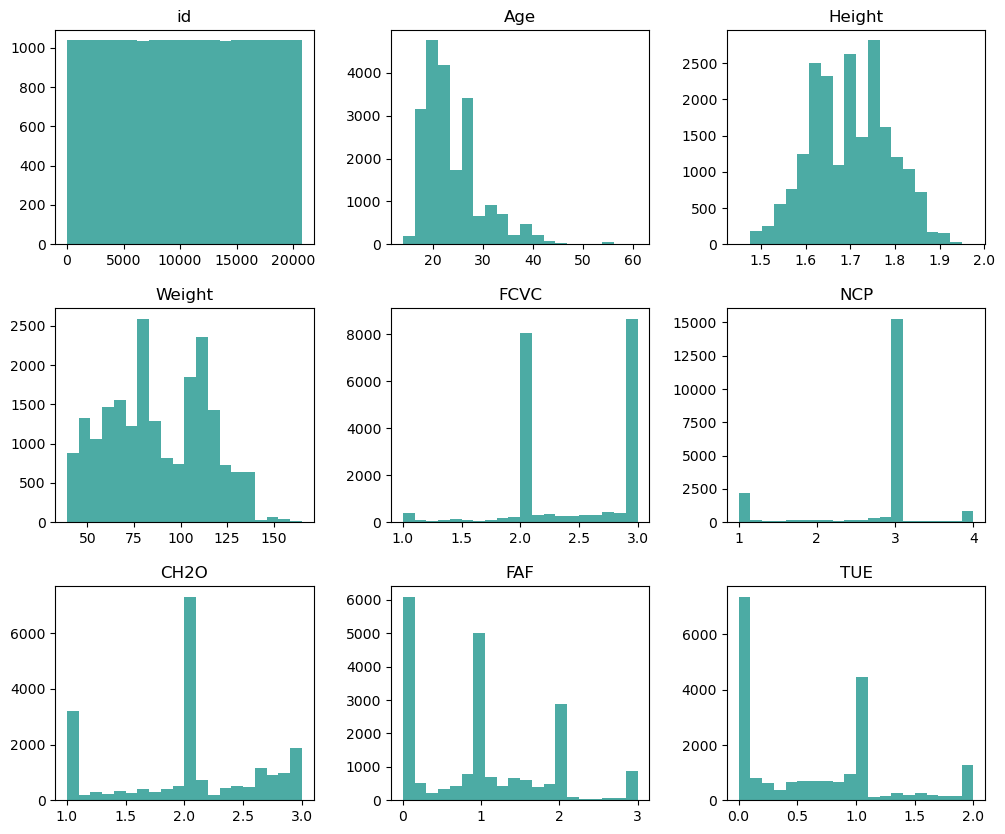

In [16]:
numerical.hist(figsize=(12, 10), bins=20, color='#4caba4', grid=False);

In [17]:
numric_columns = X_train.select_dtypes(include=[np.number]).columns

In [18]:
def showplot(columnname):
    plt.rcParams['figure.facecolor'] = 'white'
    plt.rcParams['axes.facecolor'] = 'white'
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    ax = ax.flatten()
    value_counts = categorical[columnname].value_counts()
    labels = value_counts.index.tolist()
    colors =["#4caba4", "#d68c78",'#a3a2a2','#ab90a0', '#e6daa3', '#6782a8', '#8ea677']

    # Donut Chart
    wedges, texts, autotexts = ax[0].pie(
        value_counts, autopct='%1.1f%%',textprops={'size': 9, 'color': 'white','fontweight':'bold' }, colors=colors,
        wedgeprops=dict(width=0.35),  startangle=80,   pctdistance=0.85  )
    # circle
    centre_circle = plt.Circle((0, 0), 0.6, fc='white')
    ax[0].add_artist(centre_circle)

    # Count Plot
    sns.countplot(data=categorical, y=columnname, ax=ax[1], palette=colors, order=labels)
    for i, v in enumerate(value_counts):
        ax[1].text(v + 1, i, str(v), color='black',fontsize=10, va='center')
    sns.despine(left=True, bottom=True)
    plt.yticks(fontsize=9,color='black')
    ax[1].set_ylabel(None)
    plt.xlabel("")
    plt.xticks([])
    fig.suptitle(columnname, fontsize=15, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    plt.show()

Plotting: Gender


C:\Users\FreeComp\AppData\Local\Temp\ipykernel_8664\3657494495.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=categorical, y=columnname, ax=ax[1], palette=colors, order=labels)
C:\Users\FreeComp\AppData\Local\Temp\ipykernel_8664\3657494495.py:19: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.countplot(data=categorical, y=columnname, ax=ax[1], palette=colors, order=labels)


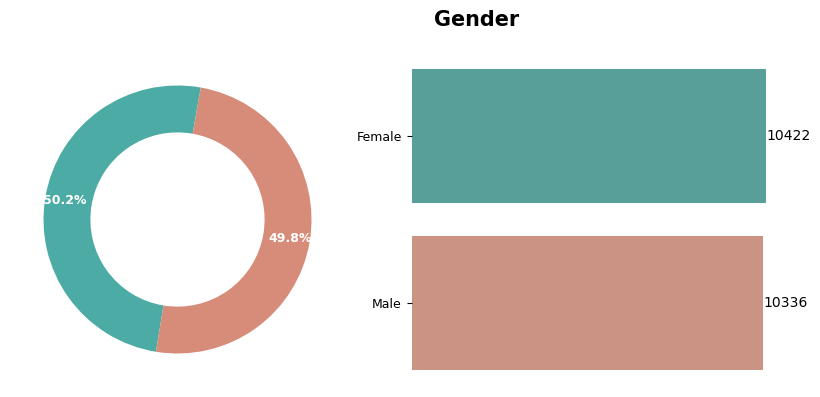

Plotting: family_history_with_overweight


C:\Users\FreeComp\AppData\Local\Temp\ipykernel_8664\3657494495.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=categorical, y=columnname, ax=ax[1], palette=colors, order=labels)
C:\Users\FreeComp\AppData\Local\Temp\ipykernel_8664\3657494495.py:19: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.countplot(data=categorical, y=columnname, ax=ax[1], palette=colors, order=labels)


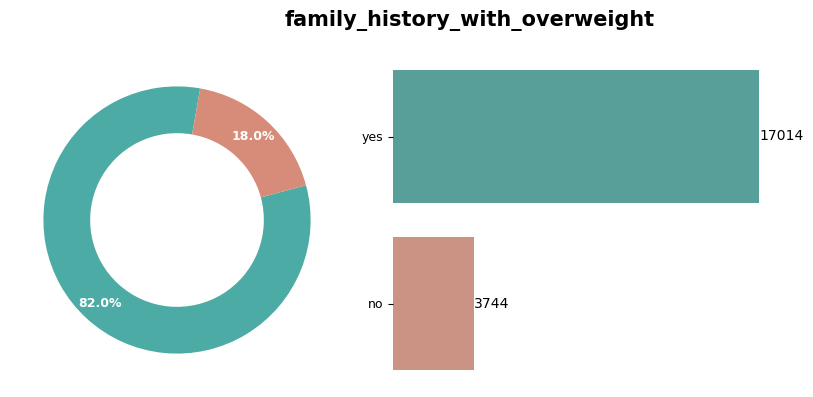

Plotting: FAVC


C:\Users\FreeComp\AppData\Local\Temp\ipykernel_8664\3657494495.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=categorical, y=columnname, ax=ax[1], palette=colors, order=labels)
C:\Users\FreeComp\AppData\Local\Temp\ipykernel_8664\3657494495.py:19: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.countplot(data=categorical, y=columnname, ax=ax[1], palette=colors, order=labels)


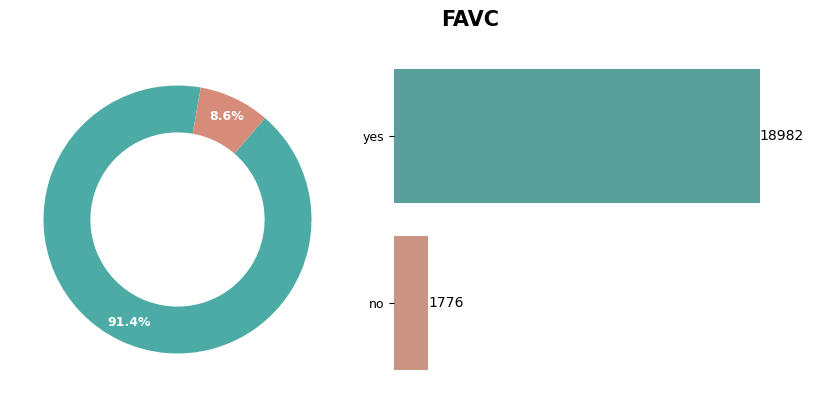

Plotting: CAEC


C:\Users\FreeComp\AppData\Local\Temp\ipykernel_8664\3657494495.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=categorical, y=columnname, ax=ax[1], palette=colors, order=labels)
C:\Users\FreeComp\AppData\Local\Temp\ipykernel_8664\3657494495.py:19: UserWarning: The palette list has more values (7) than needed (4), which may not be intended.
  sns.countplot(data=categorical, y=columnname, ax=ax[1], palette=colors, order=labels)


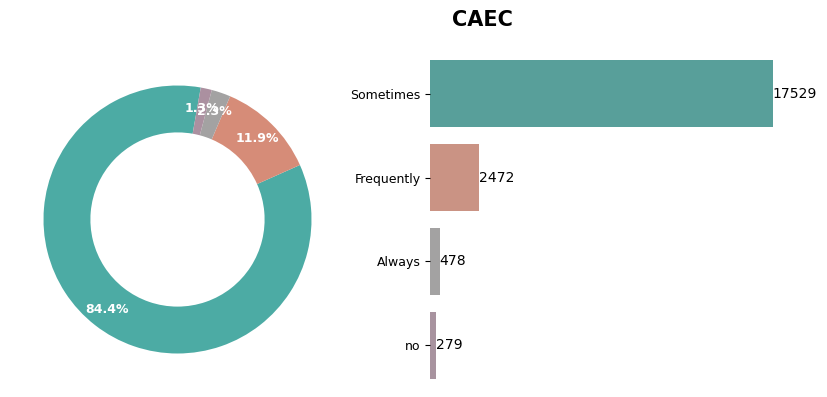

Plotting: SMOKE


C:\Users\FreeComp\AppData\Local\Temp\ipykernel_8664\3657494495.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=categorical, y=columnname, ax=ax[1], palette=colors, order=labels)
C:\Users\FreeComp\AppData\Local\Temp\ipykernel_8664\3657494495.py:19: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.countplot(data=categorical, y=columnname, ax=ax[1], palette=colors, order=labels)


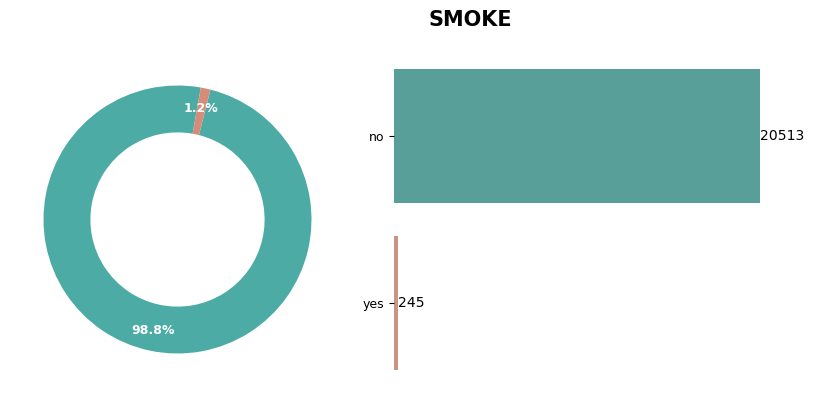

Plotting: SCC


C:\Users\FreeComp\AppData\Local\Temp\ipykernel_8664\3657494495.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=categorical, y=columnname, ax=ax[1], palette=colors, order=labels)
C:\Users\FreeComp\AppData\Local\Temp\ipykernel_8664\3657494495.py:19: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.countplot(data=categorical, y=columnname, ax=ax[1], palette=colors, order=labels)


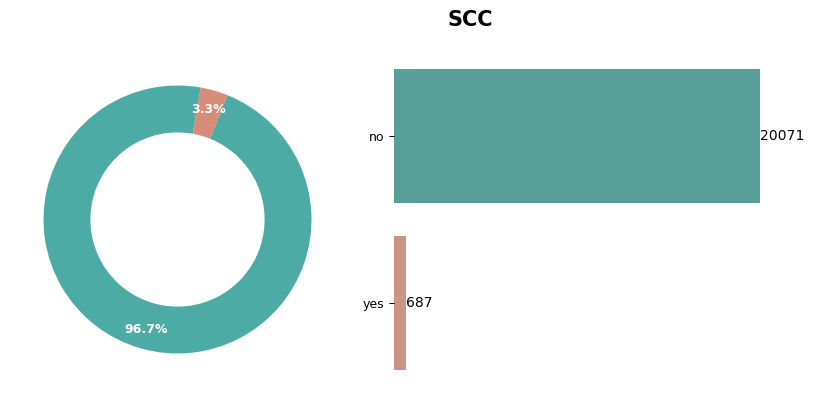

C:\Users\FreeComp\AppData\Local\Temp\ipykernel_8664\3657494495.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=categorical, y=columnname, ax=ax[1], palette=colors, order=labels)
C:\Users\FreeComp\AppData\Local\Temp\ipykernel_8664\3657494495.py:19: UserWarning: The palette list has more values (7) than needed (3), which may not be intended.
  sns.countplot(data=categorical, y=columnname, ax=ax[1], palette=colors, order=labels)


Plotting: CALC


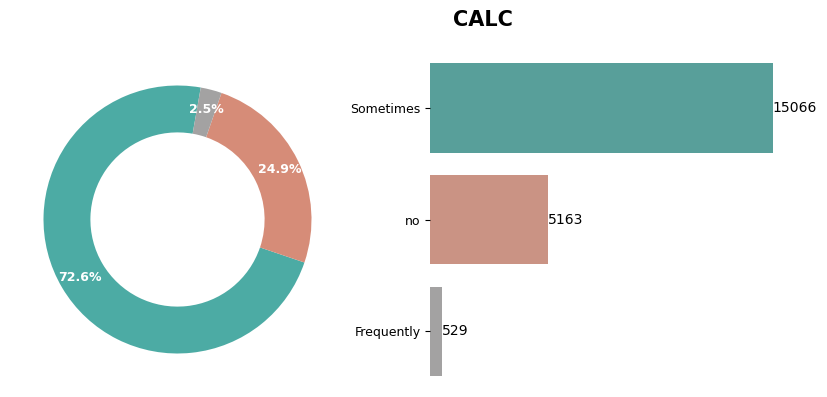

Plotting: MTRANS


C:\Users\FreeComp\AppData\Local\Temp\ipykernel_8664\3657494495.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=categorical, y=columnname, ax=ax[1], palette=colors, order=labels)
C:\Users\FreeComp\AppData\Local\Temp\ipykernel_8664\3657494495.py:19: UserWarning: The palette list has more values (7) than needed (5), which may not be intended.
  sns.countplot(data=categorical, y=columnname, ax=ax[1], palette=colors, order=labels)


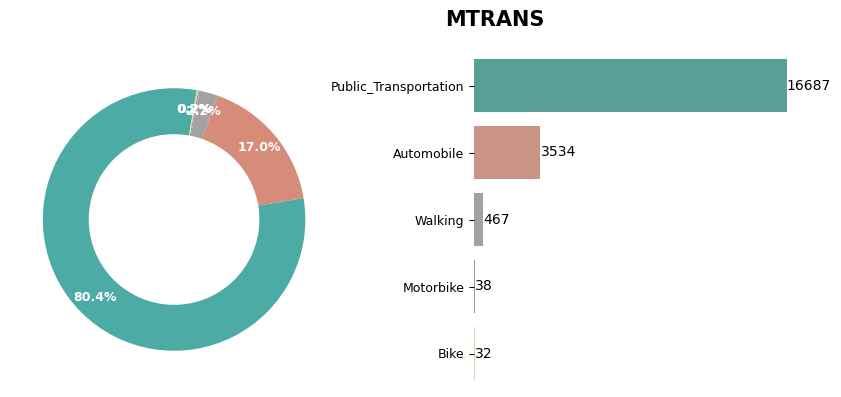

Plotting: NObeyesdad


C:\Users\FreeComp\AppData\Local\Temp\ipykernel_8664\3657494495.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=categorical, y=columnname, ax=ax[1], palette=colors, order=labels)


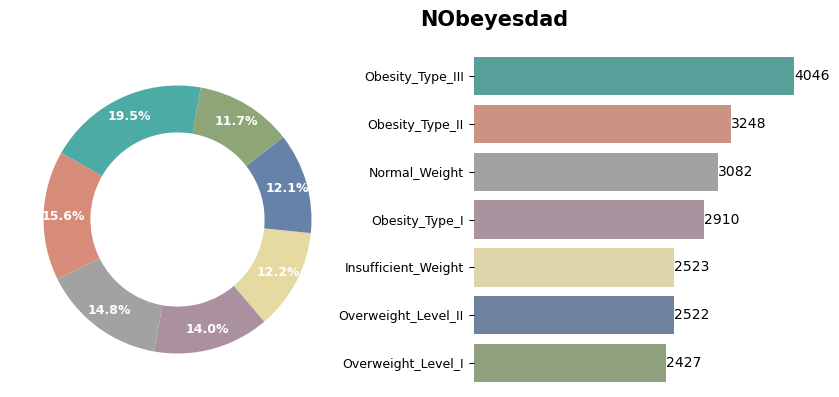

In [19]:
for column in categorical.columns:
    print(f"Plotting: {column}")
    try:
        showplot(column)
    except Exception as e:
        print(f"Error plotting {column}: {e}")

From the plots we found that:

1- Smoke column: Approximately 99% are no and 1% are yes, so there is no variance in the data, so we will drop it.

2- The SCC column : approximately 97% no and 3% yes, so we will drop it also.


#### bivariate visualization

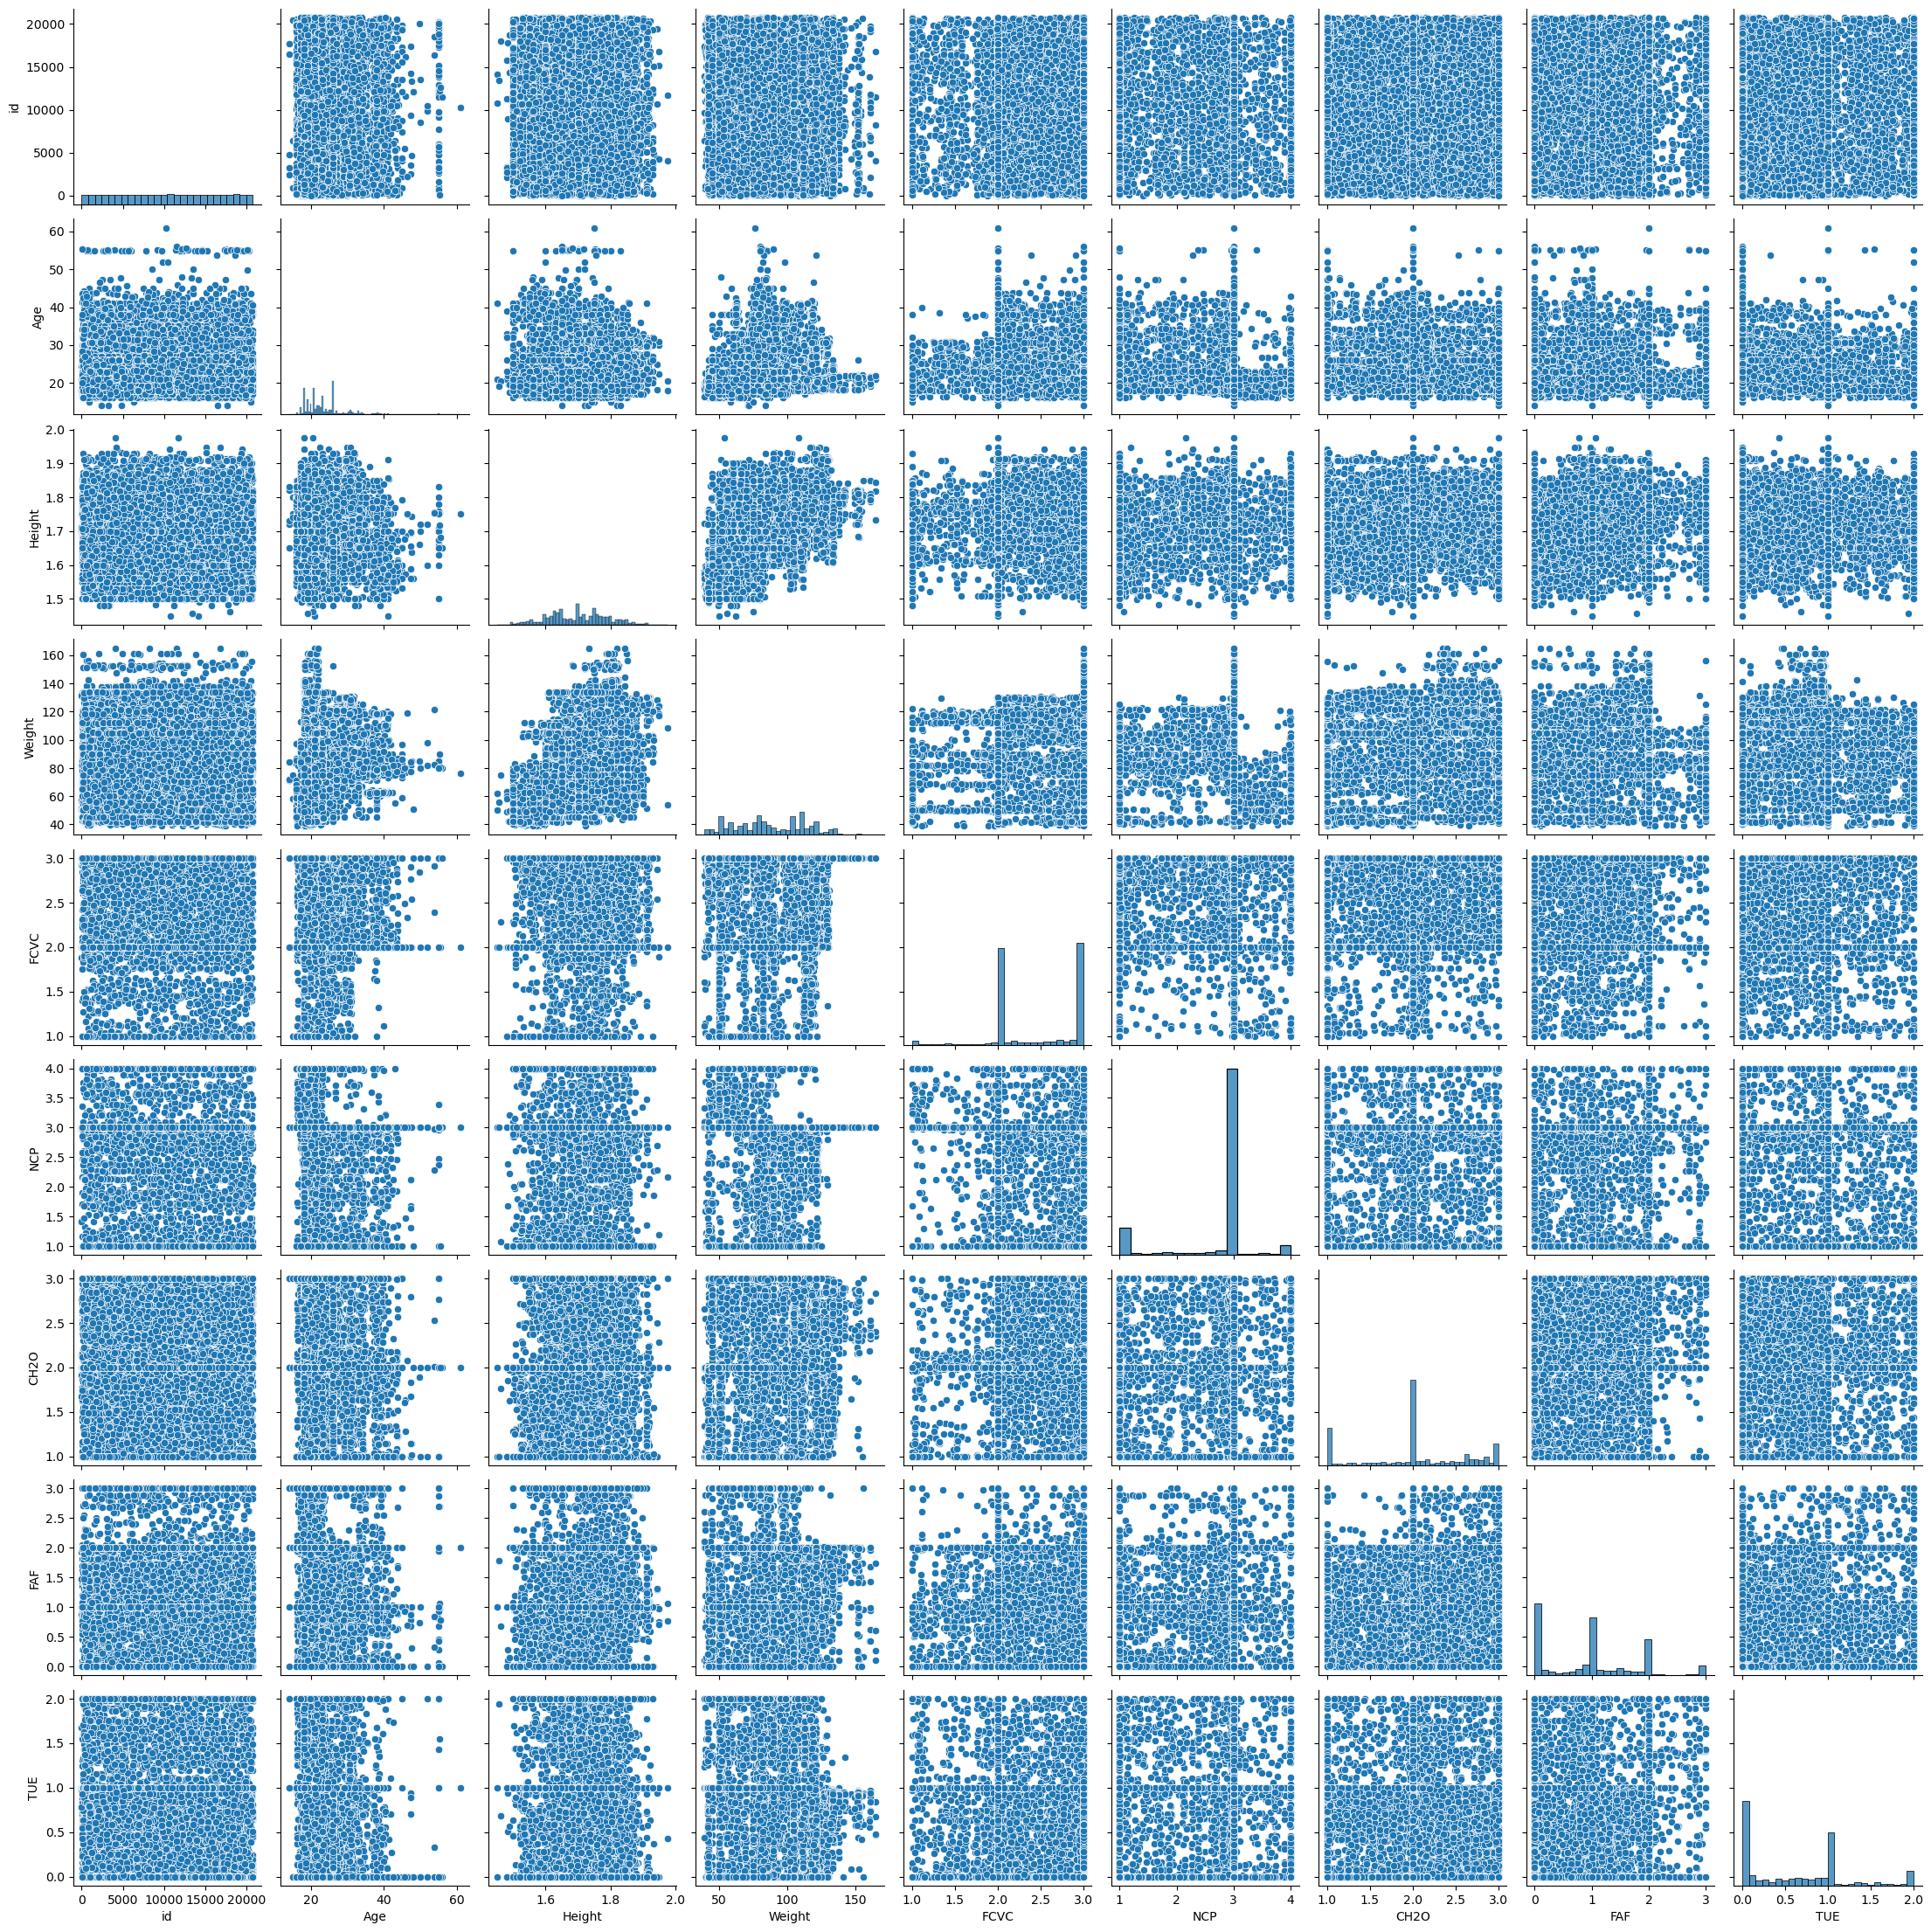

In [20]:
sns.pairplot(X_train)

In [21]:
train.groupby(['NObeyesdad',"family_history_with_overweight"]).size().reset_index(name='count')

NObeyesdad family_history_with_overweight  count
0   Insufficient_Weight                             no   1449
1   Insufficient_Weight                            yes   1074
2         Normal_Weight                             no   1292
3         Normal_Weight                            yes   1790
4        Obesity_Type_I                             no     48
5        Obesity_Type_I                            yes   2862
6       Obesity_Type_II                             no      5
7       Obesity_Type_II                            yes   3243
8      Obesity_Type_III                             no      1
9      Obesity_Type_III                            yes   4045
10   Overweight_Level_I                             no    756
11   Overweight_Level_I                            yes   1671
12  Overweight_Level_II                             no    193
13  Overweight_Level_II                            yes   2329

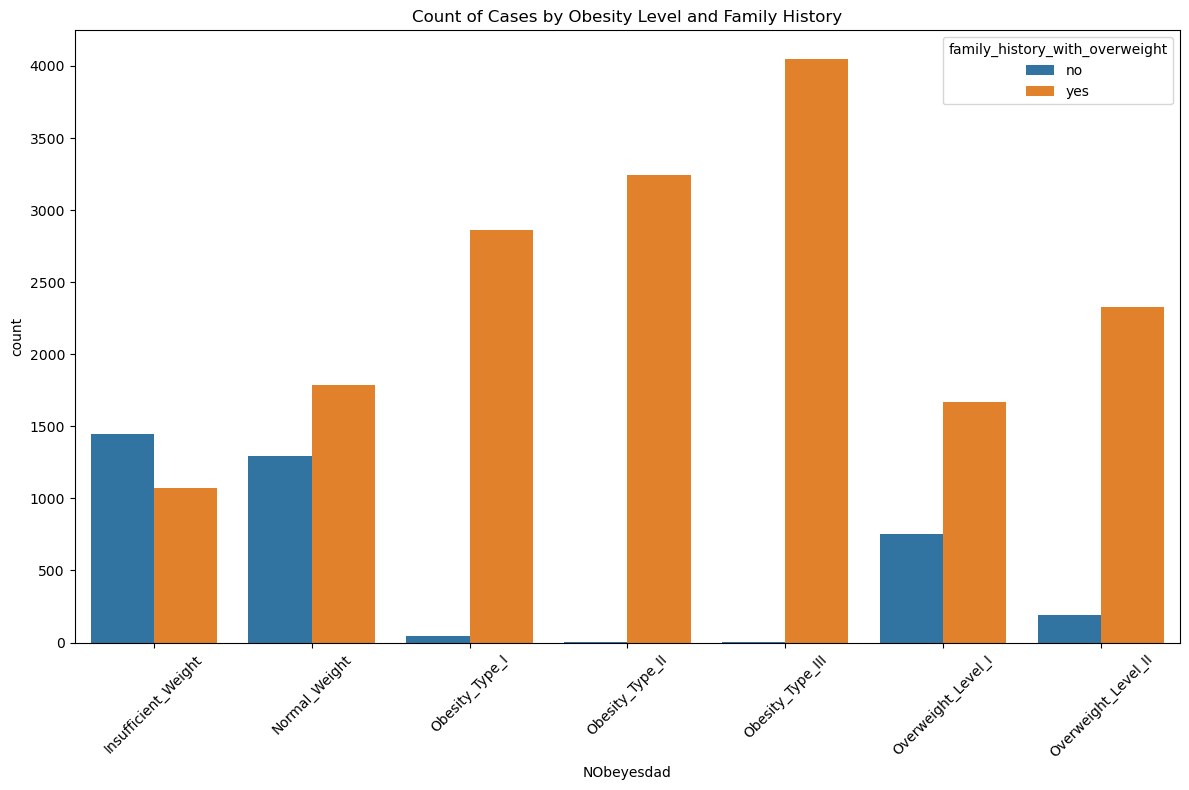

In [22]:
# Get counts of each group
count_data = train.groupby(['NObeyesdad', 'family_history_with_overweight']).size().reset_index(name='count')

# Create bar chart of counts
plt.figure(figsize=(12, 8))
sns.barplot(x='NObeyesdad', y='count', hue='family_history_with_overweight', data=count_data)
plt.title('Count of Cases by Obesity Level and Family History')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

It may be affected by genetic factors.

C:\Users\FreeComp\AppData\Local\Temp\ipykernel_8664\2389084538.py:3: UserWarning: The palette list has more values (9) than needed (7), which may not be intended.
  ax = sns.countplot(x='Gender', hue='NObeyesdad', data=train, palette=colors, dodge=True)


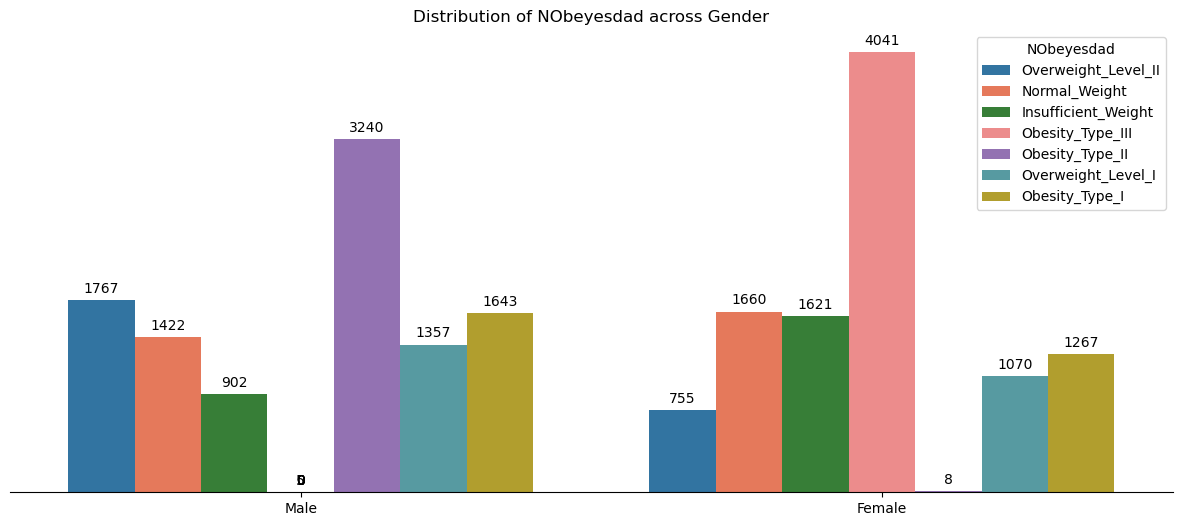

In [23]:
colors = ['#1f77b4', '#fc6c44', '#2b8a2b', '#fc7c7c', '#9467bd', '#4ba4ad', '#c7ad18', '#7f7f7f', '#69d108']
plt.figure(figsize=(15, 6))
ax = sns.countplot(x='Gender', hue='NObeyesdad', data=train, palette=colors, dodge=True)
plt.title('Distribution of NObeyesdad across Gender')
sns.despine(left=True, bottom=False)
plt.xlabel('')
plt.ylabel('')
plt.yticks([])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{round(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 8), textcoords='offset points')
plt.show()

Most women are type 3 and most men are type 2.

#### Multivarite visualization

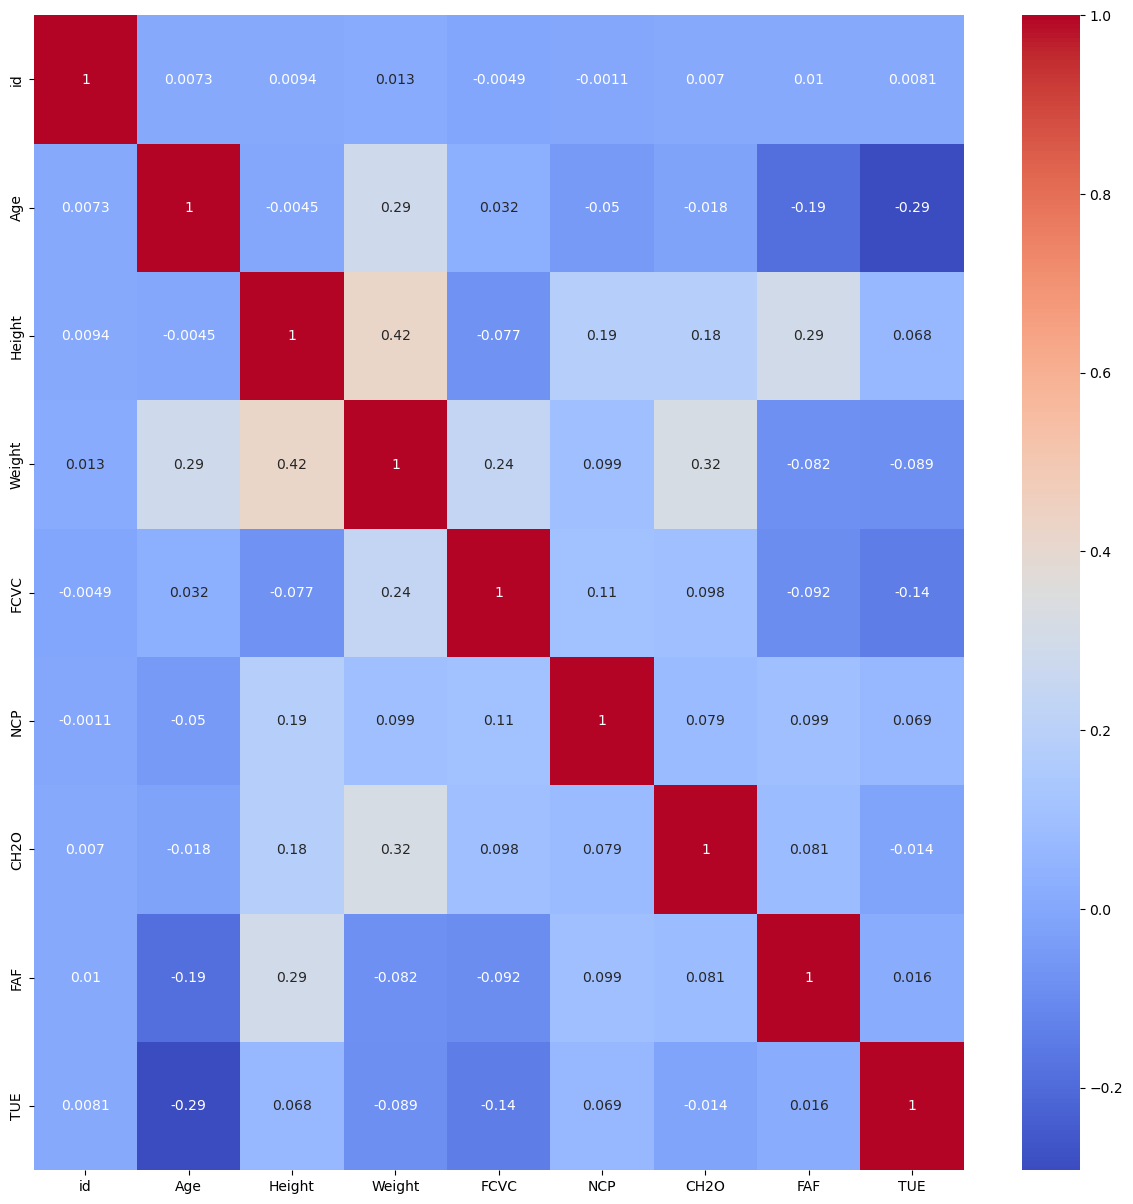

In [24]:
corr =  X_train.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True,cmap='coolwarm');

There is no big relation between the columns.

----------------

# `04` Data Preparation
Perform data cleaning, feature engineering, scaling, dropping unwanted columns (such as IDs), etc. as needed to make sure it's ready for the model.

In [25]:
X_train = X_train.drop(["id","SMOKE","SCC"],axis=1)

In [26]:
X_train['NCP'] = X_train['NCP'].round()
X_train['FAF'] = X_train['FAF'].round()

In [27]:
ordinal_features = ['CAEC', 'CALC']
categories = [
    ['no', 'Sometimes', 'Frequently', 'Always'],
    ['no', 'Sometimes', 'Frequently']
]
encoder_ord = OrdinalEncoder(categories=categories)
X_train[ordinal_features] = encoder_ord.fit_transform(X_train[ordinal_features])
X_train[ordinal_features] = X_train[ordinal_features].astype(int)


In [28]:
columns_to_encode = ['Gender', 'family_history_with_overweight', 'FAVC', 'MTRANS']

encoder = OneHotEncoder(drop="first", sparse_output=False)

x_train_onehot = encoder.fit_transform(X_train[columns_to_encode])
onehot_columns = encoder.get_feature_names_out(columns_to_encode)

onehot_df = pd.DataFrame(x_train_onehot, columns= onehot_columns, index=X_train.index)

X_train = X_train.drop(columns=columns_to_encode)

X_train = pd.concat([X_train, onehot_df], axis=1)


In [6]:
encoder_label = LabelEncoder()
y_train = encoder_label.fit_transform(y_train)

In [30]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)


### On Valdition Data

In [31]:
X_val = X_val.drop(["id","SMOKE","SCC"],axis=1)

In [32]:
X_val['NCP'] = X_val['NCP'].round()
X_val['FAF'] = X_val['FAF'].round()

In [33]:
ordinal_features = ['CAEC', 'CALC']
categories = [
    ['no', 'Sometimes', 'Frequently', 'Always'],
    ['no', 'Sometimes', 'Frequently']
]
X_val[ordinal_features] = encoder_ord.transform(X_val[ordinal_features])
X_val[ordinal_features] = X_val[ordinal_features].astype(int)


In [34]:
columns_to_encode = ['Gender', 'family_history_with_overweight', 'FAVC', 'MTRANS']

X_val_onehot = encoder.transform(X_val[columns_to_encode])
onehot_columns = encoder.get_feature_names_out(columns_to_encode)

onehot_df = pd.DataFrame(X_val_onehot, columns= onehot_columns, index=X_val.index)

X_val = X_val.drop(columns=columns_to_encode)

X_val = pd.concat([X_val, onehot_df], axis=1)


In [35]:
y_val = encoder_label.transform(y_val)

In [36]:
X_val = scaler.transform(X_val)


### On Test Data

In [ ]:
test['CALC'] = test['CALC'].replace('Always', 'Frequently')

X_test = test.drop(["id", "SMOKE", "SCC"], axis=1)

X_test['NCP'] = X_test['NCP'].round()
X_test['FAF'] = X_test['FAF'].round()

ordinal_features = ['CAEC', 'CALC']
categories = [
    ['no', 'Sometimes', 'Frequently', 'Always'],
    ['no', 'Sometimes', 'Frequently','Always']
]
X_test[ordinal_features] = encoder_ord.transform(X_test[ordinal_features])
X_test[ordinal_features] = X_test[ordinal_features].astype(int)

columns_to_encode = ['Gender', 'family_history_with_overweight', 'FAVC', 'MTRANS']
X_test_onehot = encoder.transform(X_test[columns_to_encode])
onehot_columns = encoder.get_feature_names_out(columns_to_encode)
onehot_df = pd.DataFrame(X_test_onehot, columns=onehot_columns, index=X_test.index)

X_test = X_test.drop(columns=columns_to_encode)
X_test = pd.concat([X_test, onehot_df], axis=1)

X_test = scaler.transform(X_test)


----------------------

# `05` Modeling Part



### Random Forest

In [42]:
rf = RandomForestClassifier(random_state=1234)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [43]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

In [44]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1234),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [45]:
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: ", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_val)
test_accuracy = accuracy_score(y_val, y_pred)
print("Test set accuracy: ", test_accuracy)

Best parameters found:  {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best cross-validation accuracy:  0.8968442848365541
Test set accuracy:  0.904383429672447


In [46]:
print(classification_report(y_val, best_model.predict(X_val)))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       510
           1       0.85      0.90      0.87       579
           2       0.90      0.90      0.90       588
           3       0.96      0.98      0.97       649
           4       1.00      0.99      1.00       830
           5       0.80      0.74      0.77       491
           6       0.80      0.81      0.80       505

    accuracy                           0.90      4152
   macro avg       0.89      0.89      0.89      4152
weighted avg       0.90      0.90      0.90      4152



### XGboost

In [47]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss',random_state=1234)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2]
}

In [48]:
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

In [49]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 729 candidates, totalling 2187 fits


c:\Users\FreeComp\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [03:25:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constrain...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy', verbose=2)

In [50]:
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: ", grid_search.best_score_)

# Evaluate on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_val)
test_accuracy = accuracy_score(y_val, y_pred)
print("Test set accuracy: ", test_accuracy)

Best parameters found:  {'colsample_bytree': 0.9, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
Best cross-validation accuracy:  0.9056361862591009
Test set accuracy:  0.9157032755298651


In [51]:
print(classification_report(y_val, best_model.predict(X_val)))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       510
           1       0.87      0.91      0.89       579
           2       0.91      0.91      0.91       588
           3       0.97      0.98      0.97       649
           4       1.00      0.99      1.00       830
           5       0.81      0.76      0.79       491
           6       0.82      0.84      0.83       505

    accuracy                           0.92      4152
   macro avg       0.91      0.91      0.91      4152
weighted avg       0.92      0.92      0.92      4152



------------------

# `07` Generalization Error

Now that we have tuned our solution, to an *extent*, we need to test for a final time on the held out test set.

In [ ]:
Sample = best_model.predict(X_test)
sample = pd.DataFrame(Sample, columns=['NObeyesdad'])
sample['NObeyesdad'] = encoder_label.inverse_transform(sample['NObeyesdad'])
sample["id"] = test["id"]
sample.set_index('id', inplace=True)

In [11]:
sample.to_csv('sample_submission.csv')